# Curriculum
* pandas
* some standard plotting (won't do seaborn today, but you should check it!)
* some cool kid techniques for data scientists
* python drills

# install
* gmplot
    * pip install gmplot
* geopy
    * pip install geopy

# Import relevant libraries

In [134]:
import pandas as pd # dataframes
import seaborn as sns # visualization
import sqlite3 # simple flatfile db
from StringIO import StringIO # fake files
from IPython.display import Image
# always do when you want to generate images
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Pandas
* A fast and efficient DataFrame object for data manipulation with integrated indexing
* Tools for reading and writing data in different formats: CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format;
* Intelligent data alignment and integrated handling of missing data
* Flexible reshaping and pivoting of data sets
* Aggregating or transforming data with a powerful group by engine allowing split-apply-combine operations on data sets
* Time series-functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging. 

## read data

In [159]:
# read file (many more ways to fetch data: excel, json, db, url etc)
data = pd.read_csv('../data/ufo-complete-geocoded-time-standardized.clean.csv', header = None)

In [160]:
# inspect data
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [161]:
# set columns
data.columns = ['observation_date','town','state','country_short','shape','rem','duration','description','registration_date','latitude', 'longitude']

In [167]:
# show images url: 
latitude ='https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Latitude_%28PSF%29.png/330px-Latitude_%28PSF%29.png'
longitude='https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Longitude_%28PSF%29.png/330px-Longitude_%28PSF%29.png'

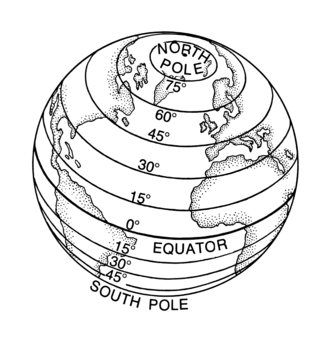

In [168]:
Image(latitude)

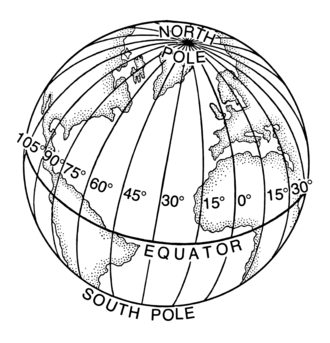

In [169]:
Image(longitude)

In [170]:
# look at data again: head and tail
data.head()
data.tail()

,observation_date,town,state,country_short,shape,duration,description,registration_date,latitude,longitude
88674,9/9/2013 22:00,napa,ca,us,other,hour,Napa UFO&#44,9/30/2013,38.2972,-122.284444
88675,9/9/2013 22:20,vienna,va,us,circle,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011,-77.265556
88676,9/9/2013 23:00,edmond,ok,us,cigar,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.6528,-97.477778
88677,9/9/2013 23:00,starr,sc,us,diamond,2 nights,On September ninth my wife and i noticed stran...,9/30/2013,34.3769,-82.695833
88678,9/9/2013 23:30,ft. lauderdale,fl,us,oval,still occuring,Hovering object lit with red and white lights&...,9/30/2013,26.1219,-80.143611


In [ ]:
# delete rem
del data["rem"]

In [172]:
# show shape of dataframe
data.shape

886790

In [173]:
# get some info on dataframe -> don't forget to include all
data.describe(include = 'all')

,observation_date,town,state,country_short,shape,duration,description,registration_date,latitude,longitude
count,88679,88679,81270,76314,85757,85662,88644,88679,88679,88679.000000
unique,76159,22018,68,5,29,9792,88283,317,25428,NaN
top,7/4/2010 22:00,seattle,ca,us,light,5 minutes,Fireball,12/12/2009,0,NaN
freq,36,570,10449,70293,17872,4796,12,1624,1155,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-85.021836
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.421744
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-176.658056
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-112.073333
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.650000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-77.769738


In [174]:
# remove all lines with NAs
data.dropna(inplace = True)

In [175]:
# show country_short value counts
data.country_short.value_counts()

us    66412
ca     3096
gb       11
au       10
Name: country_short, dtype: int64

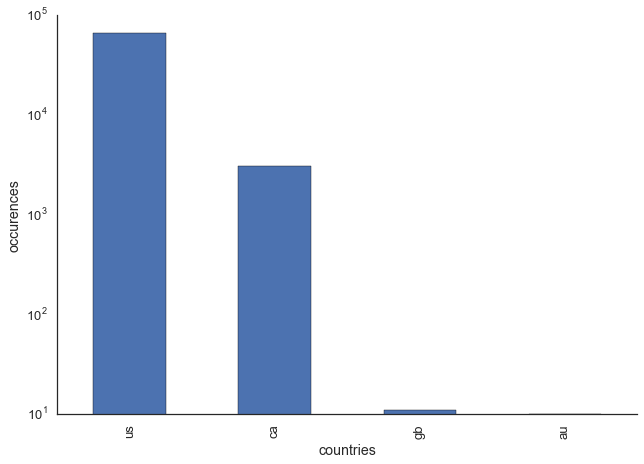

In [245]:
# plot the histogram, also with logy
sns.set_style('white')
sns.set_context('talk')
data.country_short.value_counts().plot(kind = 'bar', logy = True)
plt.ylabel('occurences')
plt.xlabel('countries')
sns.despine()

In [177]:
# indexing using query: all in salem
data.query('town == "salem"')

,observation_date,town,state,country_short,shape,duration,description,registration_date,latitude,longitude
1272,10/12/2012 18:00,salem,or,us,oval,10 minutes,An oval shaped craft emited an intense silver ...,1/10/2014,44.9430556,-123.033889
2012,10/15/1986 02:30,salem,or,us,cigar,25 minutes,Very Close Encounter.,1/11/2002,44.9430556,-123.033889
2516,10/16/1998 21:30,salem,or,us,light,10 sec,My husband and I were traveling south on I-5 n...,1/28/1999,44.9430556,-123.033889
2651,10/16/2010 18:00,salem,or,us,sphere,6-8 minutes,Single round black sphere hovering with white ...,11/21/2010,44.9430556,-123.033889
2999,10/18/2003 01:44,salem,or,us,other,bout 10 secs.,saw red light appear move rapidly through the ...,10/31/2003,44.9430556,-123.033889
3723,10/20/2013 08:10,salem,nh,us,cigar,10 seconds,Metallic object reflecting the Sun&#44 then va...,10/23/2013,42.7883333,-71.201389
6660,10/3/1999 21:45,salem,or,us,flash,2 seconds,saw something out of the corner of my eye ture...,10/19/1999,44.9430556,-123.033889
6975,10/4/2006 21:10,salem,in,us,light,20 mins,stationary -bright- sparkling/twinkling object...,10/30/2006,38.6055556,-86.101111
7060,10/4/2013 21:50,salem,or,us,triangle,15 minutes,Brilliant star-like object hovers above trees ...,10/14/2013,44.9430556,-123.033889
7061,10/4/2013 21:50,salem,or,us,triangle,15 minutes,Low flying star-like object transforms into sh...,10/14/2013,44.9430556,-123.033889


In [178]:
# index using ix
# using integer
data.ix[10,:]
# using list
data.ix[[0,2,3,4],:]
# using column list
data.ix[:,['state','latitude','longitude']]

,state,latitude,longitude
0,tx,29.8830556,-97.941111
3,tx,28.9783333,-96.645833
4,hi,21.4180556,-157.803611
5,tn,36.5950000,-82.188889
7,ct,41.1175000,-73.408333
8,al,33.5861111,-86.286111
9,fl,30.2947222,-82.984167
10,ca,33.9163889,-118.351667
11,nc,35.2333333,-82.734444
12,ny,40.6686111,-73.527500


In [179]:
# sort by town, state, observation data --> descending
data.sort_values(['town','state','observation_date'], ascending = False).head()

,observation_date,town,state,country_short,shape,duration,description,registration_date,latitude,longitude
20796,12/18/2002 17:30,zwolle,la,us,other,21:00,I have an entire armada of different type craf...,12/2/2013,31.6313889,-93.643889
87551,9/5/1999 20:50,zumbrota,mn,us,circle,3-4 seconds,Two circular shaped objects came from the nort...,10/2/1999,44.2942,-92.668889
83869,9/19/2009 23:08,zumbrota,mn,us,other,8 seconds,Octagon shaped craft made a 90 degree turn,12/12/2009,44.2942,-92.668889
22106,12/23/2000 16:30,zumbrota,mn,us,cigar,30 sec.,Silver cigar shaped object travelling low&#44 ...,1/17/2004,44.2941667,-92.668889
74529,8/18/2000 20:00,zortman,mt,us,other,2 hours,Object able to change its direction at anytime...,9/17/2000,47.9178,-108.525556


In [180]:
# groupby apply --> town vs shapes
pd.DataFrame(data.groupby("town").apply(lambda x: ";".join(sorted(x['shape'].unique().tolist()))), columns = ['shapes'])

,shapes
town,
abbeville,cigar;formation;light;triangle
abbeville (lake secession),disk
abbotsford (canada),chevron;diamond;disk;egg;fireball;formation;li...
aberdeen,changing;circle;cross;cylinder;disk;fireball;f...
abilene,changing;disk;fireball;formation;light;other;o...
abingdon,circle;cylinder;egg;fireball;light;other;recta...
abington,circle;diamond;light;triangle
abita springs,formation;triangle
absecon,triangle


In [181]:
# extract observation hour and set to int
data['observation_hour'] = data.observation_date.str.extract('(\d{2}):\d{2}').astype('int')

/Users/steffena/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


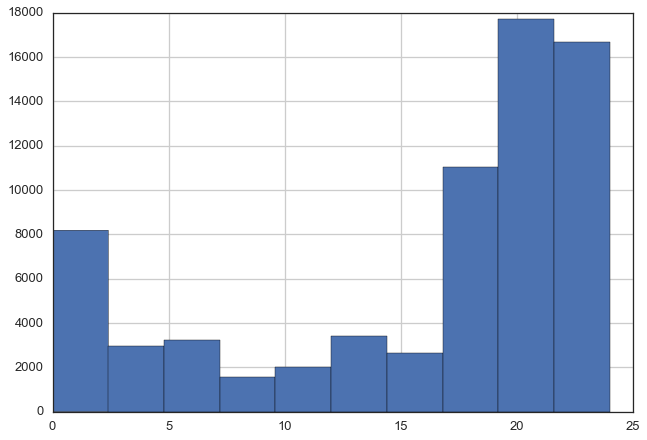

In [182]:
# plot hour histogram
data.observation_hour.hist()

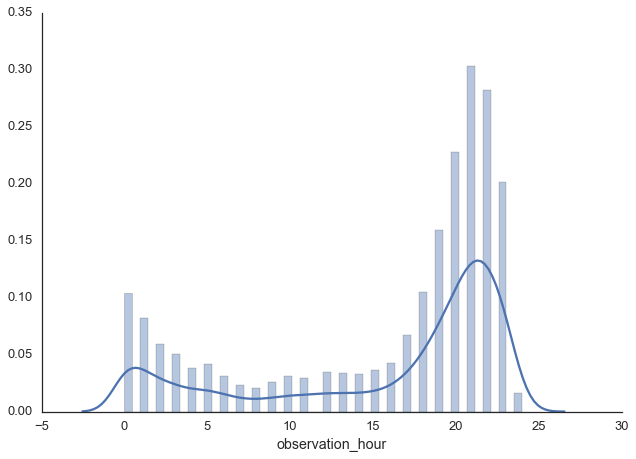

In [247]:
# ok a little seaborn
sns.distplot(data.observation_hour)
sns.despine()

In [183]:
# join country long
# show unique country_short values
data.country_short.unique()

array(['us', 'ca', 'au', 'gb'], dtype=object)

In [184]:
# make country string
countries = '''
country_short,country_long
us,united states of america
ca,canada
au,australia
gb,great britain
'''

In [185]:
# read string into pandas via StringIO
countries = pd.read_csv(StringIO(countries))

In [186]:
# merge countries
data.merge(countries, on = 'country_short')

,observation_date,town,state,country_short,shape,duration,description,registration_date,latitude,longitude,observation_hour,country_long
0,10/10/1949 20:30,san marcos,tx,us,cylinder,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,20,united states of america
1,10/10/1956 21:00,edna,tx,us,circle,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,21,united states of america
2,10/10/1960 20:00,kaneohe,hi,us,light,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,20,united states of america
3,10/10/1961 19:00,bristol,tn,us,sphere,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,19,united states of america
4,10/10/1965 23:45,norwalk,ct,us,disk,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,23,united states of america
5,10/10/1966 20:00,pell city,al,us,disk,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111,20,united states of america
6,10/10/1966 21:00,live oak,fl,us,disk,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947222,-82.984167,21,united states of america
7,10/10/1968 13:00,hawthorne,ca,us,circle,5 min.,ROUND &#44 ORANGE &#44 WITH WHAT I WOULD SAY W...,10/31/2003,33.9163889,-118.351667,13,united states of america
8,10/10/1968 19:00,brevard,nc,us,fireball,3 minutes,silent red /orange mass of energy floated by t...,6/12/2008,35.2333333,-82.734444,19,united states of america
9,10/10/1970 16:00,bellmore,ny,us,disk,30 min.,silver disc seen by family and neighbors,5/11/2000,40.6686111,-73.527500,16,united states of america


In [187]:
# join data --> set indices
data = data.set_index('country_short').join(countries.set_index('country_short')).reset_index()

In [192]:
# write into database
## open the connection
conn = sqlite3.connect('ufo.db')
## save to db
data.to_sql("ufos", conn, index = False, if_exists = 'replace')

In [193]:
# read from db
test = pd.read_sql('select * from ufos',  conn)

# get some adresses

In [229]:
from geopy.geocoders import Nominatim

In [230]:
# instantiate Nominatim
geolocator = Nominatim()

In [236]:
# iterate over top 10 geolocations and use geolocator.reverse to get adress
for ele in data[['latitude','longitude']].head(10).values:
    print ele,geolocator.reverse(tuple(ele))

['-12.45722' 130.836639] Daly Street, One Mile Dam, The Gardens, Darwin, City of Darwin, Northern Territory, 0820, Australia
['-27.42395' 117.897392] Caltex (Star Card), Great Northern Highway, Cue, Western Australia, Australia
['-26.66008' 153.099533] Aerodome Drive, Alexandra Headland, Maroochydore, QLD, 4558, Australia
['-37.813938' 144.963425] Melbourne's GPO, Postal Lane, Chinatown, Melbourne, City of Melbourne, Greater Melbourne, Victoria, 3000, Australia
['-31.95224' 115.861397] 028, Wellington Street, Northbridge, Perth, Western Australia, 6000, Australia
['-31.43084' 152.908936] Jons Family and Jewellers, Horton Street, Port Macquarie, Port Macquarie-Hastings, NSW, 2444, Australia
['-12.45722' 130.836639] Daly Street, One Mile Dam, The Gardens, Darwin, City of Darwin, Northern Territory, 0820, Australia
['-34.928661' 138.598633] 14-16, Trades Hall Lane, Adelaide, 5000, City of Adelaide, South Australia, 5000, Australia
[-34.85 138.466667] Semaphore Park, Adelaide, South Austra

# plot 1000 random ufo sightings

In [238]:
import mplleaflet

In [237]:
samples = data.sample(1000)

In [239]:
plt.scatter(samples['longitude'], samples['latitude'])
mplleaflet.display()

In [240]:
# subset the australian
australia = data.query('country_short == "au"')

In [243]:
# plot the australian
plt.scatter(australia['longitude'], australia['latitude'])
mplleaflet.display()